<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Brands_TM_Monograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing and reading the processed file containing cleaned tweets
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,Unnamed: 0,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,0,2021-03-28 23:59:56,"RT @NaheedD: With &gt;400,000 #CovidVaccine do...",rt naheedd covidvaccine doses freezers ontario...,GuntarsSilders,Hamilton,['CovidVaccine'],Canada
1,1,2021-03-28 23:59:54,22 CVS locations show #CovidVaccine slots in C...,cvs locations show covidvaccine slots ca baker...,VaccineCa,Unknown,['CovidVaccine'],Unknown
2,2,2021-03-28 23:59:47,2020: We will be back to normal as soon as we ...,back normal soon vaccines even vaccines lockdo...,thinkbalancely,Australia,"['covid19qld', 'COVID19Aus', 'Covid_19', 'Covi...",Australia
3,3,2021-03-28 23:59:45,"RT @NaheedD: With &gt;400,000 #CovidVaccine do...",rt naheedd covidvaccine doses freezers ontario...,BirthSpirit,Toronto,['CovidVaccine'],Canada
4,4,2021-03-28 23:59:36,"RT @NaheedD: With &gt;400,000 #CovidVaccine do...",rt naheedd covidvaccine doses freezers ontario...,jeffreyarcand,Ottawa,['CovidVaccine'],Canada
...,...,...,...,...,...,...,...,...
444774,444779,2021-03-25 13:40:53,RT @DrABrownDC: Shout out to @ROWPublicHealth....,rt drabrowndc shout rowpublichealth parents go...,SusanFoxton1,Unknown,[],Unknown
444775,444780,2021-03-25 13:40:52,RT @MaryLTrump: It's been a long fucking year....,rt maryltrump long fucking year donut krispykr...,cmchflowersnana,Unknown,"['KrispyKreme', 'vaccinated']",Unknown
444776,444781,2021-03-25 13:40:51,RT @MaryLTrump: It's been a long fucking year....,rt maryltrump long fucking year donut krispykr...,slross58,Westchester,"['KrispyKreme', 'vaccinated']",United States
444777,444782,2021-03-25 13:40:50,This should be the headline. \n\nHope is alive...,headline hope alive help get vaccinated vaccin...,drlucymcbride,Washington,"['vaccinated', 'Vaccination', 'COVID19', 'trus...",United States


In [ ]:
import nltk
nltk.download()

In [ ]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

# Declaring unigram list
unigramsList = []
for sentence in df['CleanedTweet']:
  try:
    # Skipping if any noise data is iterated 
    if pd.isnull(sentence) or float(sentence):
      continue
  except ValueError:
    # adding to unigram list when not float object
      unigramsList.append(word_tokenize(sentence))

unigrams = [unigram for unigram in unigramsList if unigram != []]
unigram_word = list(itertools.chain.from_iterable(unigrams))
# Calculating and displaying the frequency of the unigrams
unigram_words = nltk.FreqDist(unigram_word)


In [ ]:

df = pd.DataFrame(list(unigram_words.items()),columns = ['Unigram_Words','Frequency'])
df

,Unigram_Words,Frequency
0,rt,276634
1,naheedd,1392
2,covidvaccine,172520
3,doses,29311
4,freezers,874
...,...,...
170468,toowaiting,1
170469,freedream,1
170470,chanyeol,1
170471,drabrowndc,1


In [ ]:
# Analysing the monograms by declaring manually and categorizing them as based on different vaccines
Pfizer_Vaccine =[ 'pfizer', 'pfizervaccine','pfizercovidvaccine','modernapfizer','biotech','pfizerbiotech','pfizerbiontech'] # Pfizer Vaccine
Moderna_Vaccine =['modernavaccine','teammoderna','moderna','modernagang','modernas'] # Moderna Vaccine
Johnson_Vaccine = ['johnsonandjohnson','johnsonandjohnsonvaccine','johnsonjohnson','johnsons','borisjohnsons','johnsonampjohnson','johnsonjohnsonvax','johnsonand','janssenglobal','janssenvaccine','janssen','janssenus'] # johnsonandjohnson Vaccine
Covaxin_Vaccine =['covax','vax','covaxin','covaxsd','covaxinrockstheworld','covaxvaccinations','covaxinreiterated'] # Covaxin Vaccine
Covishield_Vaccine =['covishield','covishieldvaccine','covishielded'] # Covishield Vaccine
Astrazeneca_Vaccine = ['astrazeneca','breakingastrazeneca','oxfordastrazeneca','astrazenecas',
                       'astrazenecavaccine','astrazenecaoxford','astrazenecauk']
Sputnik_Vaccine = ['sputnikint','sputnik','sputnikvaccine','sputnikv','sputnikvaccineke',
                   'sputnikvaccineinkenya','sputnikvaccinekenya']                       

Pfizer   = df.loc[df['Unigram_Words'].isin(Pfizer_Vaccine), 'Frequency'].sum()
Moderna  = df.loc[df['Unigram_Words'].isin(Moderna_Vaccine), 'Frequency'].sum()
Johnson  = df.loc[df['Unigram_Words'].isin(Johnson_Vaccine), 'Frequency'].sum()
Covaxin  = df.loc[df['Unigram_Words'].isin(Covaxin_Vaccine), 'Frequency'].sum()
Covishield = df.loc[df['Unigram_Words'].isin(Covishield_Vaccine), 'Frequency'].sum()
Astrazeneca = df.loc[df['Unigram_Words'].isin(Astrazeneca_Vaccine), 'Frequency'].sum()
Sputnik = df.loc[df['Unigram_Words'].isin(Sputnik_Vaccine), 'Frequency'].sum()

# initialize list of lists
Different_Vaccines = [['Pfizer', Pfizer], ['Moderna', Moderna], ['Johnson', Johnson],['Covaxin', Covaxin], 
                      ['Covishield',Covishield],['Astrazeneca', Astrazeneca],['Sputnik', Sputnik]]
  
# Create the pandas DataFrame
df = pd.DataFrame(Different_Vaccines, columns = ['Vaccine_Brands', 'Brand_usage_frequency'])
df['Percentage_diff_brands'] = (df['Brand_usage_frequency'] / df['Brand_usage_frequency'].sum()) * 100
df['Percentage_diff_brands']=df['Percentage_diff_brands'].round(decimals=2)
percentageOfBrands = df['Percentage_diff_brands'].tolist()
vaccineBrands = df['Vaccine_Brands'].tolist()
# print dataframe.
df

,Vaccine_Brands,Brand_usage_frequency,Percentage_diff_brands
0,Pfizer,26779,32.319148
1,Moderna,19147,23.108209
2,Johnson,4863,5.869077
3,Covaxin,8889,10.727992
4,Covishield,2316,2.795143
5,Astrazeneca,18479,22.302011
6,Sputnik,2385,2.878418


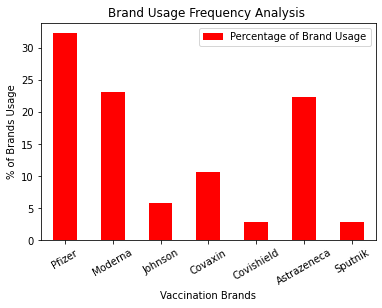

In [ ]:
import matplotlib.pyplot as plt

# set the initial x-values to what you are wanting to plot
x=vaccineBrands
y=percentageOfBrands

bars = plt.bar(x, height=y, width=.3)

xlocs, xlabs = plt.xticks()

# reference x so you don't need to change the range each time x changes
xlocs=[i for i in x]
xlabs=[i for i in x]
plotdata['Brand Usage Analysis'].plot(kind="bar", title="Brand Usage Analysis")
plt.xlabel('Vaccination Brands')
plt.ylabel('% of Brand Used')
plt.xticks(xlocs, xlabs)
plt.xticks(rotation=30, horizontalalignment="center")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .5, yval, weight="bold")

plt.show()
plt.savefig('VaccineBrands.png', dpi=300)
